Colab link: https://colab.research.google.com/drive/1L3OjtYav632M35n3xJEMCOiwCLWvJZn6?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import seaborn as sns
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from statsmodels.tools import add_constant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")
data.head(10)

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
5,2021,Apr-June,1019145,6060688.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,42,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,6
6,2021,Jan-Mar,1035445,6053833.0,330778,Black,M,Aged 25 to 34 years,Not a youth,52,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,7
7,2021,Jan-Mar,1050464,6063477.0,330778,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,8
8,2021,Jan-Mar,1045486,6053929.0,330778,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,9
9,2021,Apr-June,1012287,6004570.0,330778,Black,M,Aged 25 to 34 years,Not a youth,14,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,10


**Data cleaning**

In [3]:
#Remove the columns related to search reason and object id
df = data.iloc[:, :-6]
df.head(5)

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0


In [4]:
df['Actions_at_arrest___Concealed_i'].unique()
df.info

<bound method DataFrame.info of        Arrest_Year Arrest_Month  EventID   ArrestID  PersonID  \
0             2020    July-Sept  1005907  6017884.0    326622   
1             2020    July-Sept  1014562  6056669.0    326622   
2             2020      Oct-Dec  1029922  6057065.0    326622   
3             2021      Jan-Mar  1052190  6029059.0    327535   
4             2021      Jan-Mar  1015512  6040372.0    327535   
...            ...          ...      ...        ...       ...   
65271         2021      Oct-Dec  1055609  6044336.0    316123   
65272         2021      Oct-Dec  1032758  6031692.0    307736   
65273         2021      Oct-Dec  1021067  6064396.0    324057   
65274         2021      Oct-Dec  1008998  6008662.0    331870   
65275         2021      Oct-Dec  1033395  6032145.0    310583   

          Perceived_Race Sex    Age_group__at_arrest_  \
0                  White   M      Aged 35 to 44 years   
1                  White   M      Aged 35 to 44 years   
2      Unknown o

In [5]:
#swap the yes and no of column Actions_at_arrest___Cooperative
df['Actions_at_arrest___Cooperative'] = df['Actions_at_arrest___Cooperative'].replace({0:1,1:0})
#Aggregate the adverse actions at arrest together
df['Total_adverse_actions']=df.iloc[:,-6:].sum(axis=1)
#Remove missing values
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64615 entries, 0 to 65275
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      64615 non-null  int64  
 1   Arrest_Month                     64615 non-null  object 
 2   EventID                          64615 non-null  int64  
 3   ArrestID                         64615 non-null  float64
 4   PersonID                         64615 non-null  int64  
 5   Perceived_Race                   64615 non-null  object 
 6   Sex                              64615 non-null  object 
 7   Age_group__at_arrest_            64615 non-null  object 
 8   Youth_at_arrest__under_18_years  64615 non-null  object 
 9   ArrestLocDiv                     64615 non-null  object 
 10  StripSearch                      64615 non-null  int64  
 11  Booked                           64615 non-null  int64  
 12  Occurrence_Categor



```
# This is formatted as code
```

**Data Cleaning for final**

In [6]:
# identify duplicated rows based on EventID and ArrestID
duplicates = df.duplicated(subset=['EventID', 'PersonID'], keep=False)

# create a new DataFrame without the duplicated rows
# Removes rows that have the same combination of 'EventID' and 'ArrestID', keeping only the first occurrence of each unique combination of these two columns.
final_df = df[~duplicates].copy()


# Create another new variable that contains a continuous variable- number of arrest 
final_df['Number_of_arrest'] = final_df.groupby('PersonID')['PersonID'].transform('count')

final_df.head(10)

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,Total_adverse_actions,Number_of_arrest
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,1,Assault & Other crimes against persons,0,0,0,0,0,0,0,3
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,1,Assault & Other crimes against persons,0,0,0,0,0,1,1,3
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,1,Assault & Other crimes against persons,0,0,0,0,0,1,1,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,Harassment/Threatening,0,0,0,0,0,1,1,3
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,1,1,3
5,2021,Apr-June,1019145,6060688.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,42,...,1,Assault,0,0,0,0,0,0,0,3
6,2021,Jan-Mar,1035445,6053833.0,330778,Black,M,Aged 25 to 34 years,Not a youth,52,...,1,Assault,0,0,0,0,0,1,1,7
7,2021,Jan-Mar,1050464,6063477.0,330778,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,Robbery/Theft,0,0,0,0,0,0,0,7
8,2021,Jan-Mar,1045486,6053929.0,330778,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,Robbery/Theft,0,0,0,0,0,0,0,7
9,2021,Apr-June,1012287,6004570.0,330778,Black,M,Aged 25 to 34 years,Not a youth,14,...,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,1,1,7


# EDA Part for the number of arrest 

PersonID
300000    1
300001    1
300002    1
300003    8
300004    1
         ..
337342    5
337343    1
337344    1
337345    1
337346    1
Length: 37189, dtype: int64


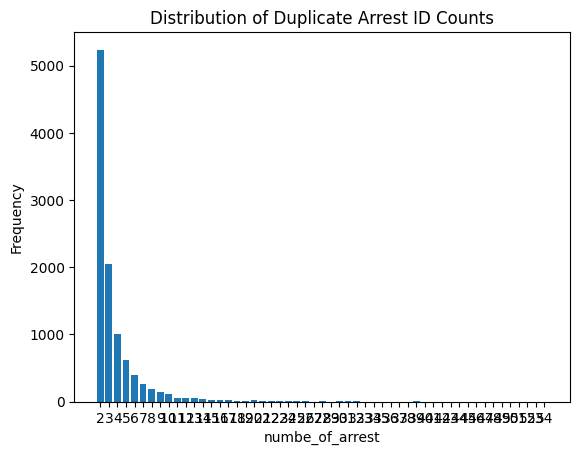

                 Frequency
numbe_of_arrest           
1                    26836
2                     5238
3                     2047
4                     1007
5                      619
6                      399
7                      255
8                      187
9                      137
10                     106
11                      58
12                      56
13                      49
14                      41
15                      27
16                      18
17                      20
18                      11
19                       4
20                      17
21                      14
22                       5
23                       7
24                       3
25                       5
26                       6
27                       1
28                       4
30                       2
31                       3
32                       2
35                       1
39                       2
46                       1
54                       1


In [7]:
# EDA par
counts = final_df.groupby( 'PersonID').size()
# Filter for groups with more than one occurrence (i.e. duplicates)
duplicates = counts[counts > 0]

# Print the resulting counts of duplicates

print(duplicates)
plt.hist(duplicates, bins=range(2, max(duplicates) + 2), align='left', rwidth=0.8)
plt.xticks(range(2, max(duplicates) + 1))
plt.xlabel('numbe_of_arrest')
plt.ylabel('Frequency')
plt.title('Distribution of Duplicate Arrest ID Counts')
plt.show()
counts_table = pd.DataFrame(duplicates.value_counts().sort_index())
counts_table.index.name = 'numbe_of_arrest'
counts_table.columns = ['Frequency']

# Print the resulting table of duplicate counts
print(counts_table)


**EDA-Data Visualization**

In [8]:
df.describe(include='all')


,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,Total_adverse_actions
count,64615.000000,64615,6.461500e+04,6.461500e+04,64615.000000,64615,64615,64615,64615,64615,64615.000000,64615.000000,64615,64615.000000,64615.000000,64615.000000,64615.000000,64615.000000,64615.000000,64615.000000
unique,NaN,4,NaN,NaN,NaN,8,3,9,3,18,NaN,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Jan-Mar,NaN,NaN,NaN,White,M,Aged 25 to 34 years,Not a youth,XX,NaN,NaN,Assault,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,17388,NaN,NaN,NaN,27407,52106,20725,61603,29019,NaN,NaN,7724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2020.512172,NaN,1.029991e+06,6.032400e+06,318601.913426,NaN,NaN,NaN,NaN,NaN,0.113457,0.524383,NaN,0.004101,0.044417,0.038474,0.033584,0.006392,0.550600,0.677567
std,0.499856,NaN,1.731938e+04,1.870613e+04,10813.930258,NaN,NaN,NaN,NaN,NaN,0.317153,0.499409,NaN,0.063910,0.206021,0.192339,0.180156,0.079693,0.497437,0.721316
min,2020.000000,NaN,1.000000e+06,6.000000e+06,300000.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,NaN,1.014988e+06,6.016200e+06,309219.500000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021.000000,NaN,1.029987e+06,6.032402e+06,318594.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,2021.000000,NaN,1.044998e+06,6.048596e+06,327922.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000


Text(0.5, 0, 'Perceived race')

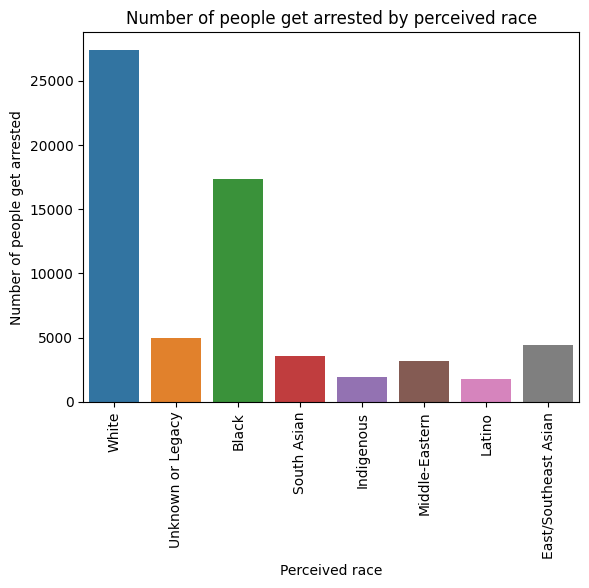

In [9]:
# Create a bar chart using seaborn
sns.barplot(data=df, x='Perceived_Race', y='Total_adverse_actions',estimator=len)
# Rotate xlabel
plt.xticks(rotation=90)
# Add chart title and axis label
plt.title('Number of people get arrested by perceived race')
plt.ylabel('Number of people get arrested')
plt.xlabel('Perceived race')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Unknown or Legacy'),
  Text(2, 0, 'Black'),
  Text(3, 0, 'South Asian'),
  Text(4, 0, 'Indigenous'),
  Text(5, 0, 'Middle-Eastern'),
  Text(6, 0, 'Latino'),
  Text(7, 0, 'East/Southeast Asian')])

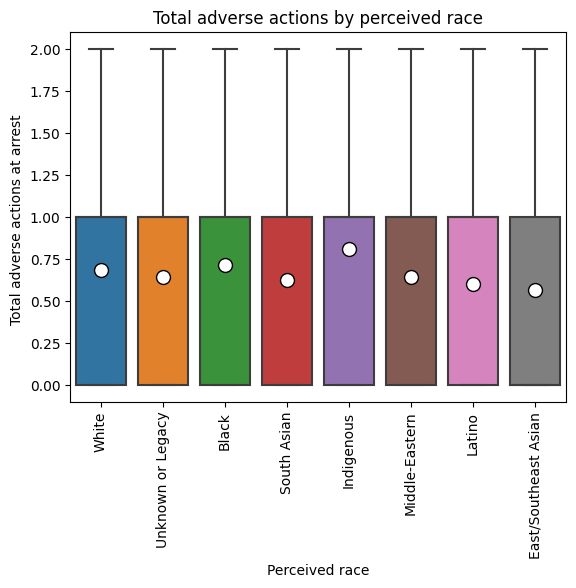

In [10]:
# Create a box chart using seaborn
plt2 = sns.boxplot(x="Perceived_Race", y="Total_adverse_actions", data=df, showfliers=False, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black", 
                       "markersize":"10"})
plt2.set_title('Total adverse actions by perceived race')
plt.ylabel('Total adverse actions at arrest ')
plt.xlabel('Perceived race')
# Adjust font size
sns.set(font_scale = 1.2)
# Rotate xlabel
plt.xticks(rotation=90)


<ipython-input-11-311c83f7af86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_group__at_arrest'] = df['Age_group__at_arrest_'].replace({'Aged 65 and older': 'Aged 65 years and older'})
<ipython-input-11-311c83f7af86>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_group__at_arrest'] = df['Age_group__at_arrest'].replace({'Aged 17 years and under': 'Aged 17 years and younger'})


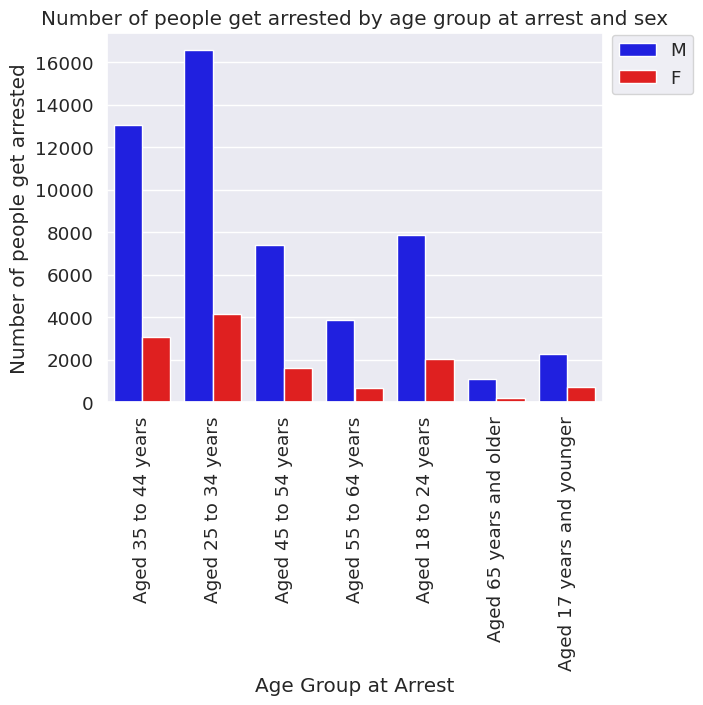

In [11]:
# Combine same categories 
df['Age_group__at_arrest'] = df['Age_group__at_arrest_'].replace({'Aged 65 and older': 'Aged 65 years and older'})
df['Age_group__at_arrest'] = df['Age_group__at_arrest'].replace({'Aged 17 years and under': 'Aged 17 years and younger'})
# Filter the data 
df_filtered = df[df['Sex'] != 'U']
# create barplot using seaborn
plt3=sns.barplot(x='Age_group__at_arrest', y='Total_adverse_actions', hue= 'Sex', data=df_filtered, palette=['blue', 'red'], estimator=len)
# set the legend
plt3.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
# Set the chart title and axis label 
plt.title('Number of people get arrested by age group at arrest and sex')
plt.ylabel('Number of people get arrested')
plt.xlabel('Age Group at Arrest')
# Rotate xlabel
plt.xticks(rotation=90)
# Adjust font size
sns.set(font_scale = 1.0)

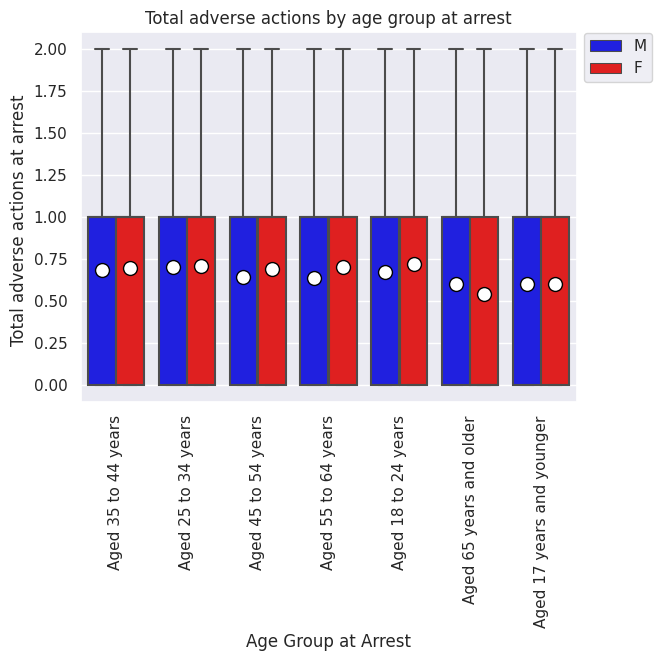

In [12]:
# Filter the data 
df_filtered = df[df['Sex'] != 'U']
# create barplot using seaborn
plt4= sns.boxplot(x='Age_group__at_arrest', y='Total_adverse_actions', hue='Sex', palette=['blue', 'red'], data=df_filtered, showfliers=False, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black", 
                       "markersize":"10"})
# set the legend
plt4.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
# Rotate xlabel
plt.xticks(rotation=90)
# Set the chart title and asix label
plt.title("Total adverse actions by age group at arrest")
plt.ylabel('Total adverse actions at arrest ')
plt.xlabel('Age Group at Arrest')
# Adjust font size
sns.set(font_scale = 1.0)

Text(0.5, 0, 'Youth at arrest under 18 years')

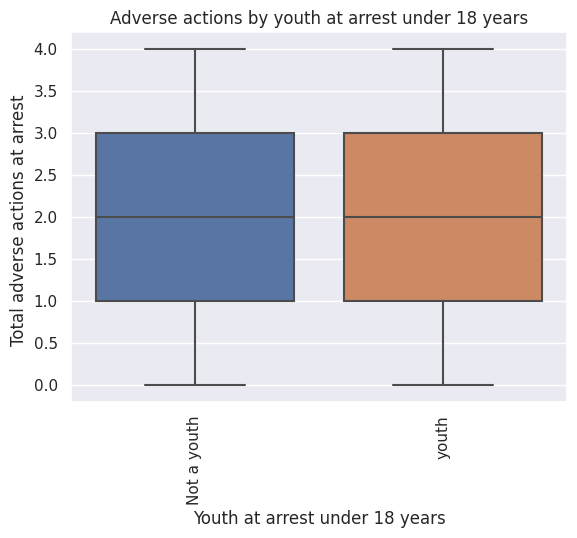

In [13]:
# Group data by age group
df_grouped = df.groupby(['Youth_at_arrest__under_18_years', 'Total_adverse_actions']).size().reset_index(name='count')
# Replace 'Youth (aged 17 years and under)' with 'Youth (aged 17 and younger)', and rename new group as youth
df_grouped['Youth_at_arrest__under_18_years'] = df_grouped['Youth_at_arrest__under_18_years'].replace(['Youth (aged 17 years and under)', 'Youth (aged 17 and younger)'],'youth')
# Plot boxplot
plt5= sns.boxplot(x='Youth_at_arrest__under_18_years', y='Total_adverse_actions', data= df_grouped)
# Rotate xlabel
plt.xticks(rotation=90)
# Add title and axis labels
plt.title('Adverse actions by youth at arrest under 18 years')
plt.ylabel('Total adverse actions at arrest ')
plt.xlabel('Youth at arrest under 18 years')



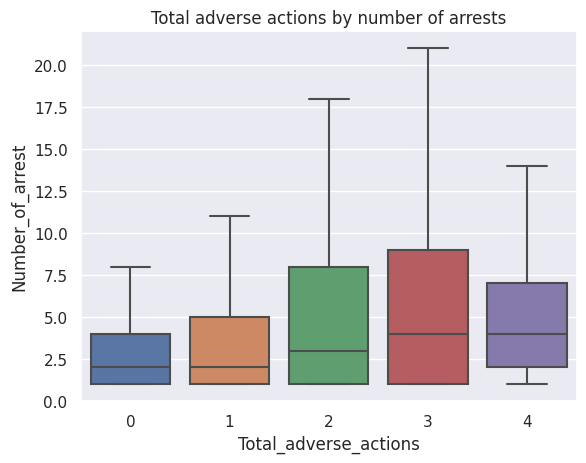

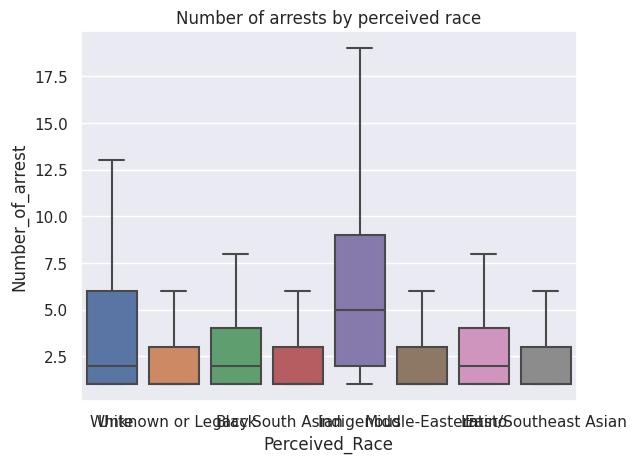

In [14]:
# Final EDA NEW 
import seaborn as sns
import matplotlib.pyplot as plt
# Create a scatter plot of Total adverse actions versus Number of arrest
# sns.scatterplot(x='Number_of_arrest', y='Total_adverse_actions', hue='Perceived_Race', style='Perceived_Race', data=final_df)
# plt.show()
# 
sns.boxplot(y='Number_of_arrest', x='Total_adverse_actions', data=final_df,showfliers=False)
plt.title('Total adverse actions by number of arrests')

plt.show()


# let 'Perceived_Race' column contains white, and minorities。
#final_df['Perceived_Race'].unique()
# Replace all non-'White' values with 'Minorities'
#final_df['Perceived_Race'] = final_df['Perceived_Race'].apply(lambda x: 'Minorities' if x != 'White' else 'White')
# Check the unique values again
#final_df['Perceived_Race'].value_counts()


sns.boxplot(x='Perceived_Race', y='Number_of_arrest', data=final_df, showfliers=False)
plt.title('Number of arrests by perceived race')

plt.show()

# Method - Power 

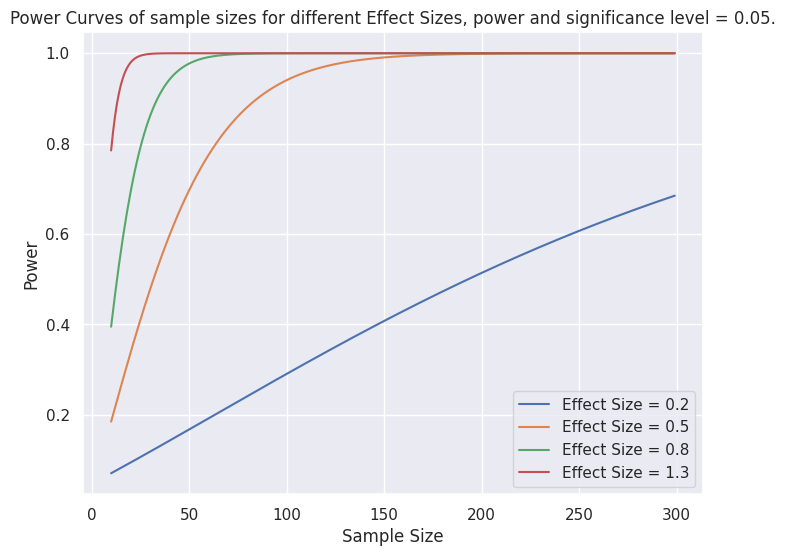

In [15]:
import numpy as np
import statsmodels.stats.power as smp

# Set effect sizes and sample sizes
effect_sizes = np.array([0.2, 0.5, 0.8, 1.3])
sample_sizes = np.arange(10,300)

# Set significance level
alpha = 0.05

# Initialize array to store power values
power_vals = np.zeros((len(effect_sizes), len(sample_sizes)))

# Calculate power for different effect sizes and sample sizes
for i, effect_size in enumerate(effect_sizes):
    for j, sample_size in enumerate(sample_sizes):
        power_vals[i,j] = smp.TTestIndPower().power(effect_size=effect_size, nobs1=sample_size, alpha=alpha, ratio=1, alternative='two-sided')

# Plot power curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for i, effect_size in enumerate(effect_sizes):
    plt.plot(sample_sizes, power_vals[i], label=f'Effect Size = {effect_size}')

plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power Curves of sample sizes for different Effect Sizes, power and significance level = 0.05.')
plt.legend()
plt.show()



In [16]:
# The calculated sample size 

import numpy as np
from statsmodels.stats.power import TTestIndPower

# Set parameters for power analysis
alpha = 0.05
power = 0.8
effect_size = 0.2

# Create instance of TTestIndPower
power_analysis = TTestIndPower()

# Calculate required sample size
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)

print(f"Required sample size: {int(np.ceil(sample_size))}")

Required sample size: 394


/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


**T-test 1: Sex and adverse actions at arrest**

In [17]:
def welch_dof(x, y): 
    '''
    Takes in outcome values for binary features
    Returns degrees of freedom 
    '''
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof

In [18]:
df['Sex'].unique()

array(['M', 'F', 'U'], dtype=object)

In [19]:
#create sex groups from dataset 
sex_F = df[df['Sex']=='F']
sex_M = df[df['Sex']=='M']

#get number of rows of each sub-dataset
print(sex_F.shape[0])
print(sex_M.shape[0])

taa_F = sex_F['Total_adverse_actions']
taa_M = sex_M['Total_adverse_actions']

#conduct ttest
print('Ttest results for total adverse actions at arrest:',stats.ttest_ind(taa_F, taa_M, equal_var=False)) #p value is significant

12500
52106
Ttest results for total adverse actions at arrest: Ttest_indResult(statistic=3.147227611937536, pvalue=0.001650833116985814)


In [20]:
#calculate mean and standard deviation of groups 
#Female suspects show higher mean total adverse actions at arrest 
print('Mean total adverse actions at arrest, Female, Male:',taa_F.mean(), taa_M.mean())
print('Standard deviation for total adverse actions at arrest, Female, Male:',taa_F.std(), taa_M.std())

Mean total adverse actions at arrest, Female, Male: 0.69584 0.6731278547576095
Standard deviation for total adverse actions at arrest, Female, Male: 0.7256506183457659 0.7201530083801411


In [21]:
# compute confidence interval 
cm = sms.CompareMeans(sms.DescrStatsW(taa_F), sms.DescrStatsW(taa_M))
print('Confidence interval for total adverse actions at arrest:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for total adverse actions at arrest: (0.008567046580899382, 0.03685724390388165)


In [22]:
#welch dof 
print('DOF for total adverse actions at arrest:',welch_dof(taa_F, taa_M))

DOF for total adverse actions at arrest: 18850.71265891232


In [23]:
#Create table
import pandas as pd
datatest1 = pd.DataFrame({'statistic': 3.147227611937536, 'pvalue': 0.001650833116985814, 'Mean F': 0.69584 , 'Mean M': 0.6731278547576095, 'sd F': 0.7256506183457659, 'sd M': 0.7201530083801411,
                          'CI': '(0.008567046580899382, 0.03685724390388165)', 'DOF': 18850.71265891232}, index=[0])


print(datatest1)

   statistic    pvalue   Mean F    Mean M      sd F      sd M  \
0   3.147228  0.001651  0.69584  0.673128  0.725651  0.720153   

                                            CI           DOF  
0  (0.008567046580899382, 0.03685724390388165)  18850.712659  


**T-test 2: Age(Youth) and adverse actions at arrest**

In [24]:
df['Youth_at_arrest__under_18_years'].unique()

array(['Not a youth', 'Youth (aged 17 and younger)',
       'Youth (aged 17 years and under)'], dtype=object)

In [25]:
#create age groups from dataset 
youth_y = df[df['Youth_at_arrest__under_18_years'].isin(['Youth (aged 17 and younger)' , 'Youth (aged 17 years and under)'])]
youth_n = df[df['Youth_at_arrest__under_18_years']=='Not a youth']

#get number of rows of each sub-dataset
print(youth_y.shape[0])
print(youth_n.shape[0])

taa_y = youth_y['Total_adverse_actions']
taa_n = youth_n['Total_adverse_actions']

#conduct ttest
print('Ttest results for total adverse actions at arrest:',stats.ttest_ind(taa_y, taa_n, equal_var=False)) #p value is significant

3012
61603
Ttest results for total adverse actions at arrest: Ttest_indResult(statistic=-6.646632192508723, pvalue=3.4778796282425664e-11)


In [26]:
#calculate mean and standard deviation of groups 
#Youth suspects show higher mean total adverse actions at arrest 
print('Mean total adverse actions at arrest, Youth, Adult:',taa_y.mean(), taa_n.mean())
print('Standard deviation for total adverse actions at arrest, Youth, Adult:',taa_y.std(), taa_n.std())

Mean total adverse actions at arrest, Youth, Adult: 0.602257636122178 0.6812492898073146
Standard deviation for total adverse actions at arrest, Youth, Adult: 0.6322204043522315 0.7251954420602996


In [27]:
# compute confidence interval 
cm2 = sms.CompareMeans(sms.DescrStatsW(taa_y), sms.DescrStatsW(taa_n))
print('Confidence interval for total adverse actions at arrest:',cm2.tconfint_diff(usevar='unequal'))

Confidence interval for total adverse actions at arrest: (-0.10229304318502694, -0.05569026418524628)


In [28]:
import pandas as pd
datatest2 = pd.DataFrame({'statistic': -6.646632192508723, 'pvalue': 3.4778796282425664e-11, 'Mean Y': 0.602257636122178, 'Mean A': 0.6812492898073146, 'sd Y': 0.6322204043522315, 'sd A': 0.7251954420602996,'CI': '(-0.10229304318502694, -0.05569026418524628)'}, index=[0])


print(datatest2)

   statistic        pvalue    Mean Y    Mean A     sd Y      sd A  \
0  -6.646632  3.477880e-11  0.602258  0.681249  0.63222  0.725195   

                                             CI  
0  (-0.10229304318502694, -0.05569026418524628)  


**T-test 3: Asian&other race and adverse actions at arrest**

In [29]:
df['Perceived_Race'].unique()

array(['White', 'Unknown or Legacy', 'Black', 'South Asian', 'Indigenous',
       'Middle-Eastern', 'Latino', 'East/Southeast Asian'], dtype=object)

In [30]:
#separate into different racial groups
taa_W = df[df['Perceived_Race'] == 'White']['Total_adverse_actions']
taa_B = df[df['Perceived_Race'] == 'Black']['Total_adverse_actions']
taa_Asia = df[df['Perceived_Race'].isin(['South Asian' , 'East/Southeast Asian'])]['Total_adverse_actions']
taa_Other = df[df['Perceived_Race'].isin(['Middle-Eastern' , 'Latino', 'Indigenous'])]['Total_adverse_actions']

In [31]:
#Create a new df
df_without_UnknownOrLegacy = df[df['Perceived_Race'] != 'Unknown or Legacy']
dfANOVA1 = df_without_UnknownOrLegacy.replace({'Perceived_Race' : { 'South Asian' : 'Asian', 'East/Southeast Asian': 'Asian', 'Indigenous' : 'Other', 'Middle-Eastern' : 'Other', 'Latino': 'Other' }})
dfANOVA1.shape[0]

59613

In [32]:
#conduct ttest
print('Ttest results for total adverse actions at arrest:',stats.ttest_ind(taa_Asia, taa_Other, equal_var=False)) #p value is significant

#calculate mean and standard deviation of groups  
print('Mean total adverse actions at arrest, Asian, Other:',taa_Asia.mean(), taa_Other.mean())
print('Standard deviation for total adverse actions at arrest, Asian, Other:',taa_Asia.std(), taa_Other.std())

# compute confidence interval 
cm3 = sms.CompareMeans(sms.DescrStatsW(taa_Asia), sms.DescrStatsW(taa_Other))
print('Confidence interval for total adverse actions at arrest:',cm3.tconfint_diff(usevar='unequal'))

datatest3 = pd.DataFrame({'statistic': stats.ttest_ind(taa_Asia, taa_Other, equal_var=False)[0], 'pvalue': stats.ttest_ind(taa_Asia, taa_Other, equal_var=False)[1], 'Mean A':taa_Asia.mean(), 'Mean O': taa_Other.mean(), 'sd A': taa_Asia.std(), 'sd O': taa_Other.std(),'CIlower': cm3.tconfint_diff(usevar='unequal')[0], 'CIhigher':cm3.tconfint_diff(usevar='unequal')[1] }, index=[0])
print(datatest3)

Ttest results for total adverse actions at arrest: Ttest_indResult(statistic=-7.236390975642464, pvalue=4.850912934926185e-13)
Mean total adverse actions at arrest, Asian, Other: 0.5939614131796542 0.6772409778812573
Standard deviation for total adverse actions at arrest, Asian, Other: 0.6502945213941342 0.7389727328457266
Confidence interval for total adverse actions at arrest: (-0.10583766869955454, -0.06072146070365152)
   statistic        pvalue    Mean A    Mean O      sd A      sd O   CIlower  \
0  -7.236391  4.850913e-13  0.593961  0.677241  0.650295  0.738973 -0.105838   

   CIhigher  
0 -0.060721  


**T-test 4: Black&White and adverse actions at arrest**





In [33]:
#conduct ttest
print('Ttest results for total adverse actions at arrest:',stats.ttest_ind(taa_W, taa_B, equal_var=False)) #p value is significant

#calculate mean and standard deviation of groups 
print('Mean total adverse actions at arrest, Youth, Adult:',taa_W.mean(), taa_B.mean())
print('Standard deviation for total adverse actions at arrest, Youth, Adult:',taa_W.std(), taa_B.std())

# compute confidence interval 
cm4 = sms.CompareMeans(sms.DescrStatsW(taa_W), sms.DescrStatsW(taa_B))
print('Confidence interval for total adverse actions at arrest:',cm4.tconfint_diff(usevar='unequal'))

datatest4 = pd.DataFrame({'statistic': stats.ttest_ind(taa_W, taa_B, equal_var=False)[0], 'pvalue': stats.ttest_ind(taa_W, taa_B, equal_var=False)[1], 'Mean W':taa_W.mean(), 'Mean B': taa_B.mean(), 'sd W': taa_W.std(), 'sd B': taa_B.std(),'CIlower': cm4.tconfint_diff(usevar='unequal')[0], 'CIhigher':cm4.tconfint_diff(usevar='unequal')[1] }, index=[0])
print(datatest4)

Ttest results for total adverse actions at arrest: Ttest_indResult(statistic=-4.5826543915126905, pvalue=4.6064634554287875e-06)
Mean total adverse actions at arrest, Youth, Adult: 0.6834385375998833 0.7163439372982942
Standard deviation for total adverse actions at arrest, Youth, Adult: 0.7265643926661843 0.7486119504940232
Confidence interval for total adverse actions at arrest: (-0.046979243316707275, -0.018831556080114498)
   statistic    pvalue    Mean W    Mean B      sd W      sd B   CIlower  \
0  -4.582654  0.000005  0.683439  0.716344  0.726564  0.748612 -0.046979   

   CIhigher  
0 -0.018832  


**T-test 5: Asian&Black and adverse actions at arrest**

In [34]:
#conduct ttest
print('Ttest results for total adverse actions at arrest:',stats.ttest_ind(taa_Asia, taa_B, equal_var=False)) #p value is significant

#calculate mean and standard deviation of groups 
print('Mean total adverse actions at arrest, Youth, Adult:',taa_Asia.mean(), taa_B.mean())
print('Standard deviation for total adverse actions at arrest, Youth, Adult:',taa_Asia.std(), taa_B.std())

# compute confidence interval 
cm5 = sms.CompareMeans(sms.DescrStatsW(taa_Asia), sms.DescrStatsW(taa_B))
print('Confidence interval for total adverse actions at arrest:',cm5.tconfint_diff(usevar='unequal'))

datatest5 = pd.DataFrame({'statistic': stats.ttest_ind(taa_Asia, taa_B, equal_var=False)[0], 'pvalue': stats.ttest_ind(taa_Asia, taa_B, equal_var=False)[1], 'Mean A':taa_Asia.mean(), 'Mean B': taa_B.mean(), 'sd A': taa_Asia.std(), 'sd B': taa_B.std(),'CIlower': cm5.tconfint_diff(usevar='unequal')[0], 'CIhigher':cm5.tconfint_diff(usevar='unequal')[1] }, index=[0])
print(datatest5)

Ttest results for total adverse actions at arrest: Ttest_indResult(statistic=-13.252694714504685, pvalue=6.750426928299146e-40)
Mean total adverse actions at arrest, Youth, Adult: 0.5939614131796542 0.7163439372982942
Standard deviation for total adverse actions at arrest, Youth, Adult: 0.6502945213941342 0.7486119504940232
Confidence interval for total adverse actions at arrest: (-0.14048312829512924, -0.10428191994215062)
   statistic        pvalue    Mean A    Mean B      sd A      sd B   CIlower  \
0 -13.252695  6.750427e-40  0.593961  0.716344  0.650295  0.748612 -0.140483   

   CIhigher  
0 -0.104282  


**T-test 6: Asian&other race and number of arrest**

In [35]:
final_df['Perceived_Race'].unique()

#separate into different racial groups
noa_W = final_df[final_df['Perceived_Race'] == 'White']['Number_of_arrest']
noa_B = final_df[final_df['Perceived_Race'] == 'Black']['Number_of_arrest']
noa_Asia = final_df[final_df['Perceived_Race'].isin(['South Asian' , 'East/Southeast Asian'])]['Number_of_arrest']
noa_Other = final_df[final_df['Perceived_Race'].isin(['Middle-Eastern' , 'Latino', 'Indigenous'])]['Number_of_arrest']

#Create a new df
final_df_without_UnknownOrLegacy_final_ttest = final_df[final_df['Perceived_Race'] != 'Unknown or Legacy']
final_dfttest = final_df_without_UnknownOrLegacy_final_ttest.replace({'Perceived_Race' : { 'South Asian' : 'Asian', 'East/Southeast Asian': 'Asian', 'Indigenous' : 'Other', 'Middle-Eastern' : 'Other', 'Latino': 'Other' }})
final_dfttest.shape[0]

59231

In [36]:
#conduct ttest
print('Ttest results for number of arrest:',stats.ttest_ind(noa_Asia, noa_Other, equal_var=False)) #p value is significant

#calculate mean and standard deviation of groups  
print('Mean number of arrest, Asian, Other:',noa_Asia.mean(), noa_Other.mean())
print('Standard deviation for number of arrest, Asian, Other:',noa_Asia.std(), noa_Other.std())

# compute confidence interval 
cm3_final_ttest = sms.CompareMeans(sms.DescrStatsW(noa_Asia), sms.DescrStatsW(noa_Other))
print('Confidence interval for number of arrest:',cm3_final_ttest.tconfint_diff(usevar='unequal'))

datatest3_final_ttest = pd.DataFrame({'statistic': stats.ttest_ind(noa_Asia, noa_Other, equal_var=False)[0], 'pvalue': stats.ttest_ind(noa_Asia, noa_Other, equal_var=False)[1], 'Mean A':noa_Asia.mean(), 'Mean O': noa_Other.mean(), 'sd A': noa_Asia.std(), 'sd O': noa_Other.std(),'CIlower': cm3_final_ttest.tconfint_diff(usevar='unequal')[0], 'CIhigher':cm3_final_ttest.tconfint_diff(usevar='unequal')[1] }, index=[0])
print(datatest3_final_ttest)

Ttest results for number of arrest: Ttest_indResult(statistic=-19.83228684522396, pvalue=4.683876588017642e-86)
Mean number of arrest, Asian, Other: 2.768292682926829 4.466744799296806
Standard deviation for number of arrest, Asian, Other: 3.859925803911002 6.1055784385087115
Confidence interval for number of arrest: (-1.8663230938045714, -1.5305811389353823)
   statistic        pvalue    Mean A    Mean O      sd A      sd O   CIlower  \
0 -19.832287  4.683877e-86  2.768293  4.466745  3.859926  6.105578 -1.866323   

   CIhigher  
0 -1.530581  


**T-test 7: Black&White and number of arrest**

In [37]:
# compute confidence interval 
cm4_final_ttest = sms.CompareMeans(sms.DescrStatsW(noa_W), sms.DescrStatsW(noa_B))
print('Confidence interval for number of arrest:',cm4_final_ttest.tconfint_diff(usevar='unequal'))

datatest4_final_ttest = pd.DataFrame({'statistic': stats.ttest_ind(noa_W, noa_B, equal_var=False)[0], 'pvalue': stats.ttest_ind(noa_W, noa_B, equal_var=False)[1], 'Mean W':noa_W.mean(), 'Mean B': noa_B.mean(), 'sd W': noa_W.std(), 'sd B': noa_B.std(),'CIlower': cm4_final_ttest.tconfint_diff(usevar='unequal')[0], 'CIhigher':cm4_final_ttest.tconfint_diff(usevar='unequal')[1] }, index=[0])
print(datatest4_final_ttest)

Confidence interval for number of arrest: (0.5387118880845995, 0.7431017899754385)
   statistic        pvalue    Mean W    Mean B      sd W      sd B   CIlower  \
0  12.292133  1.160054e-34  4.557535  3.916628  5.573331  5.212871  0.538712   

   CIhigher  
0  0.743102  


**T-test 8: Asian&Black and number of arrest**

In [38]:
# compute confidence interval 
cm5_final_ttest = sms.CompareMeans(sms.DescrStatsW(noa_Asia), sms.DescrStatsW(noa_B))
print('Confidence interval for number of arrest:',cm5_final_ttest.tconfint_diff(usevar='unequal'))

datatest5_final_ttest = pd.DataFrame({'statistic': stats.ttest_ind(noa_Asia, noa_B, equal_var=False)[0], 'pvalue': stats.ttest_ind(noa_Asia, noa_B, equal_var=False)[1], 'Mean A':noa_Asia.mean(), 'Mean B': noa_B.mean(), 'sd A': noa_Asia.std(), 'sd B': noa_B.std(),'CIlower': cm5_final_ttest.tconfint_diff(usevar='unequal')[0], 'CIhigher':cm5_final_ttest.tconfint_diff(usevar='unequal')[1] }, index=[0])
print(datatest5_final_ttest)

Confidence interval for number of arrest: (-1.2634778461834628, -1.0331927099322238)
   statistic        pvalue    Mean A    Mean B      sd A      sd B   CIlower  \
0 -19.548199  2.540819e-84  2.768293  3.916628  3.859926  5.212871 -1.263478   

   CIhigher  
0 -1.033193  


**One way ANOVA - Race & total adverse actions at arrest**

In [39]:
from scipy.stats import f_oneway

# One-way ANOVA
statistic1, pvalue1 = f_oneway(taa_W, taa_Asia, taa_B, taa_Other)

print(f'One-way ANOVA: s = {statistic1}, p = {pvalue1}')

One-way ANOVA: s = 52.26377561222336, p = 9.992511720477068e-34


In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model1 = ols('Total_adverse_actions ~ C(Perceived_Race)', data=dfANOVA1).fit()
anova_table = sm.stats.anova_lm(model1, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Perceived_Race),82.378001,3.0,52.263776,9.992512e-34
Residual,31318.507041,59609.0,NaN,NaN


In [41]:
def get_significance(p):
    """Returns the significance of a p-values as a string of stars."""
    if p <= 0.001:
        return '***'
    elif p <= 0.01:
        return '**'
    elif p <= 0.05:
        return '*'
    elif p <= 0.1:
        return '.'
    else:
        return ''


def round_p_value(p):
    """Round a small p-value so that it is human-readable."""
    if p < 0.001:
        return '<0.001'
    else:
        return f'{p:5.3}'


p_rounded1 = round_p_value(pvalue1)
significance1 = get_significance(pvalue1)
print(f'The p-value is {p_rounded1} ({significance1})')

The p-value is <0.001 (***)


In [42]:
#1 way anova with tukey hsd
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=dfANOVA1['Total_adverse_actions'],
                          groups=dfANOVA1['Perceived_Race'],
                          alpha=0.05)

#display results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Asian  Black   0.1224    0.0  0.0972  0.1476   True
 Asian  Other   0.0833    0.0  0.0526  0.1139   True
 Asian  White   0.0895    0.0  0.0658  0.1132   True
 Black  Other  -0.0391 0.0009 -0.0656 -0.0126   True
 Black  White  -0.0329    0.0  -0.051 -0.0148   True
 Other  White   0.0062 0.9212 -0.0189  0.0313  False
----------------------------------------------------


**Two-way ANOVA - Gender, Age & total adverse actions at arrest**

In [43]:
df['Youth_at_arrest__under_18_years'].unique()

array(['Not a youth', 'Youth (aged 17 and younger)',
       'Youth (aged 17 years and under)'], dtype=object)

In [44]:
#Create a new df for this 2 way ANOVA
df_2_way_prep = df[df['Sex'] != 'U']
dfANOVA2 = df_2_way_prep.replace({'Youth_at_arrest__under_18_years' : { 'Youth (aged 17 and younger)' : 'Youth', 'Youth (aged 17 years and under)': 'Youth', 'Not a youth' : 'Adult'}})
dfANOVA2.shape[0]

64606

In [45]:
#perform two-way ANOVA
model2 = ols('Total_adverse_actions ~ C(Sex) + C(Youth_at_arrest__under_18_years) + C(Sex):C(Youth_at_arrest__under_18_years)', data=dfANOVA2).fit()
sm.stats.anova_lm(model2, typ=2)

,sum_sq,df,F,PR(>F)
C(Sex),5.749983,1.0,11.060177,8.825084e-04
C(Youth_at_arrest__under_18_years),18.446134,1.0,35.481411,2.588235e-09
C(Sex):C(Youth_at_arrest__under_18_years),0.457811,1.0,0.880606,3.480392e-01
Residual,33585.393357,64602.0,NaN,NaN


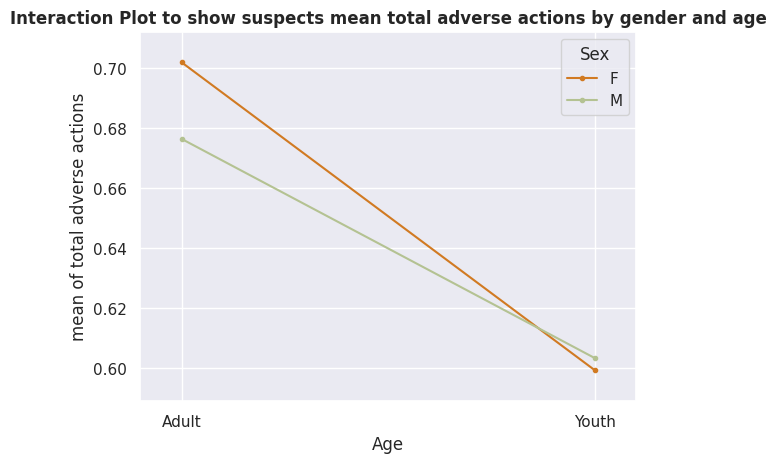

In [46]:
#interaction plots in 2 way anova
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=dfANOVA2['Youth_at_arrest__under_18_years'], trace=dfANOVA2['Sex'], response=dfANOVA2['Total_adverse_actions'], 
    colors=['#d17a22', '#b4c292'], xlabel = 'Age', ylabel = 'total adverse actions')
plt.title('Interaction Plot to show suspects mean total adverse actions by gender and age', fontweight='bold')
plt.show()

# Final -Ancova Model

In [47]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64199 entries, 0 to 65275
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      64199 non-null  int64  
 1   Arrest_Month                     64199 non-null  object 
 2   EventID                          64199 non-null  int64  
 3   ArrestID                         64199 non-null  float64
 4   PersonID                         64199 non-null  int64  
 5   Perceived_Race                   64199 non-null  object 
 6   Sex                              64199 non-null  object 
 7   Age_group__at_arrest_            64199 non-null  object 
 8   Youth_at_arrest__under_18_years  64199 non-null  object 
 9   ArrestLocDiv                     64199 non-null  object 
 10  StripSearch                      64199 non-null  int64  
 11  Booked                           64199 non-null  int64  
 12  Occurrence_Categor

In [48]:
# Specify the variables for the ANCOVA
# let 'Perceived_Race' column contains white, and minorities。
final_df['Perceived_Race'].unique()	
# Replace all non-'White' values with 'Minorities'
final_df['Perceived_Race'] = final_df['Perceived_Race'].apply(lambda x: 'Minorities' if x != 'White' else 'White')
# Check the unique values again
final_df['Perceived_Race'].unique()

import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

independent_var = 'Perceived_Race'
dependent_var = 'Total_adverse_actions'
covariate = 'Number_of_arrest'

# Perform the ANCOVA using statsmodels
model = sm.formula.ols(f'{dependent_var} ~ {independent_var} + {covariate}', data=final_df).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Total_adverse_actions   R-squared:                       0.014
Model:                               OLS   Adj. R-squared:                  0.014
Method:                    Least Squares   F-statistic:                     452.7
Date:                   Sun, 16 Apr 2023   Prob (F-statistic):          6.12e-196
Time:                           02:38:34   Log-Likelihood:                -69747.
No. Observations:                  64199   AIC:                         1.395e+05
Df Residuals:                      64196   BIC:                         1.395e+05
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

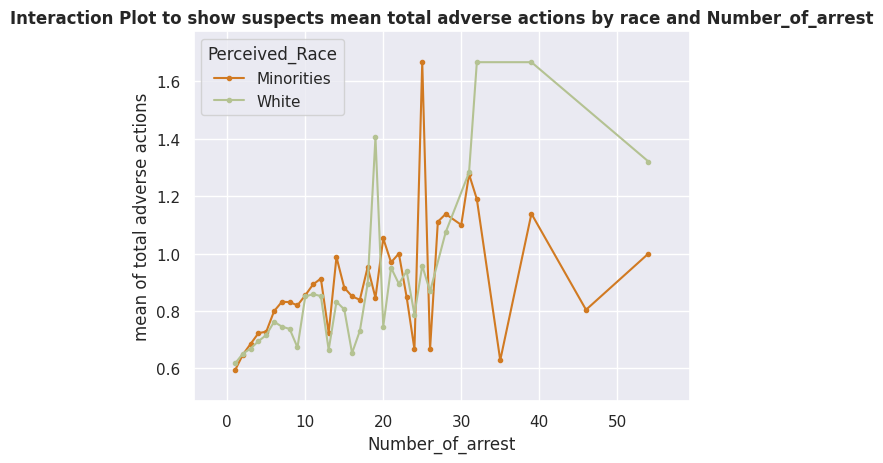

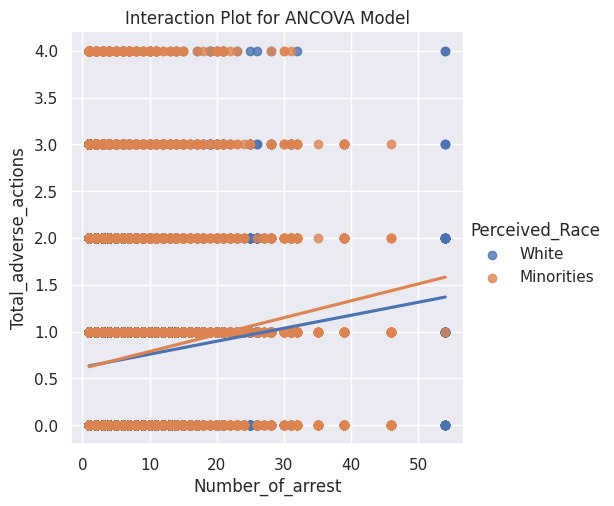

In [49]:
#interaction plots in 2 way ancova
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
independent_var = 'Perceived_Race'
dependent_var = 'Total_adverse_actions'
covariate = 'Number_of_arrest'


fig = interaction_plot(x=final_df['Number_of_arrest'], trace=final_df['Perceived_Race'], response=final_df['Total_adverse_actions'], 
    colors=['#d17a22', '#b4c292'], xlabel = 'Number_of_arrest', ylabel = 'total adverse actions')
plt.title('Interaction Plot to show suspects mean total adverse actions by race and Number_of_arrest', fontweight='bold')
plt.show()
import seaborn as sns

# Add a regression line for each group (perceived race)
sns.lmplot(x=covariate, y=dependent_var, hue=independent_var, data=final_df, ci=None)

# Add labels for the x-axis, y-axis, and plot title
plt.xlabel(covariate)
plt.ylabel(dependent_var)
plt.title('Interaction Plot for ANCOVA Model')

# Show the plot
plt.show()

In [50]:
# Interaction effect
model = sm.formula.ols(f'{dependent_var} ~ {independent_var} * {covariate}', data=final_df).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Total_adverse_actions   R-squared:                       0.014
Model:                               OLS   Adj. R-squared:                  0.014
Method:                    Least Squares   F-statistic:                     306.9
Date:                   Sun, 16 Apr 2023   Prob (F-statistic):          7.42e-198
Time:                           02:38:41   Log-Likelihood:                -69739.
No. Observations:                  64199   AIC:                         1.395e+05
Df Residuals:                      64195   BIC:                         1.395e+05
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

# Ancova- effect size and power 

In [51]:
final_df['Perceived_Race'].value_counts()

Minorities    36972
White         27227
Name: Perceived_Race, dtype: int64

In [52]:


# calculate pooled standard deviation
n_white = len(final_df[final_df['Perceived_Race'] == 'White'])
n_nonwhite = len(final_df[final_df['Perceived_Race'] == 'Minorities'])

df_white = n_white - 2
df_nonwhite = n_nonwhite - 2
pooled_sd = np.sqrt(((df_white * np.var(final_df[final_df['Perceived_Race'] == 'White']['Total_adverse_actions'], ddof=1)) 
                     + (df_nonwhite * np.var(final_df[final_df['Perceived_Race'] == 'Minorities']['Total_adverse_actions'], ddof=1))) 
                    / (df_white + df_nonwhite))

# calculate Cohen's d for difference between white and non-white groups
mean_white = final_df[final_df['Perceived_Race'] == 'White']['Total_adverse_actions'].mean()
mean_nonwhite = final_df[final_df['Perceived_Race'] == 'Minorities']['Total_adverse_actions'].mean()
cohens_d = (mean_white - mean_nonwhite) / pooled_sd

print("Cohen's d for difference between white and Minorities groups:", cohens_d)


Cohen's d for difference between white and Minorities groups: 0.014319852007730716


# ANCOVA Assumption 


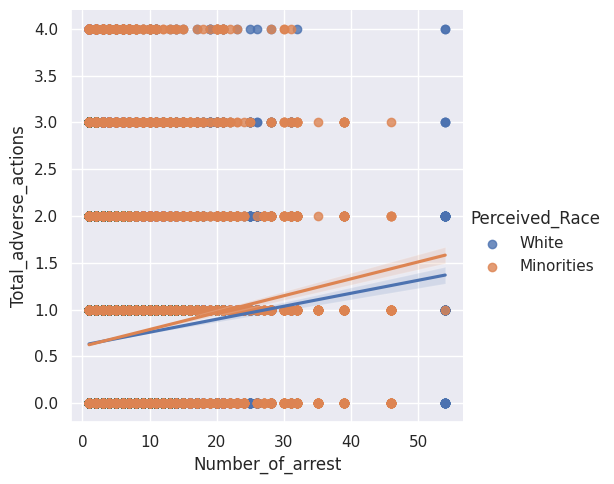

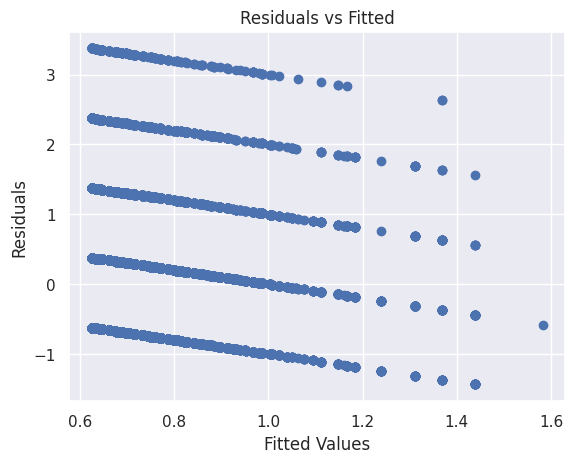

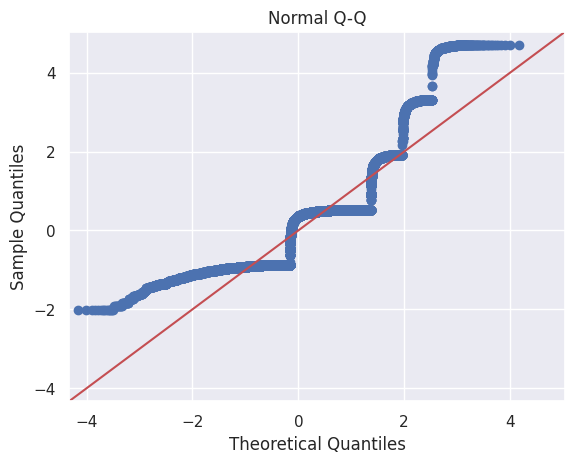

Levene test statistic: 376.86, p-value: 0.00
Shapiro-Wilk test statistic: 0.61, p-value: 0.00


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [53]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

# Fit the ANCOVA model
model = sm.formula.ols(f'{dependent_var} ~ {independent_var} * {covariate}', data=final_df).fit()
import seaborn as sns

# create an interaction plot
sns.lmplot(x="Number_of_arrest", y="Total_adverse_actions", hue="Perceived_Race", data=final_df)
plt.show()

# Residual vs Fitted plot to check for linearity and constant variance
residuals = model.resid
fitted = model.fittedvalues
plt.scatter(fitted, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# Q-Q plot to check for normality of residuals
residuals_norm = stats.zscore(residuals)
sm.qqplot(residuals_norm, line='45')
plt.title('Normal Q-Q')
plt.show()

# Levene's test to check for homogeneity of variances
homoscedasticity = sm.stats.diagnostic.het_breuschpagan(residuals, model.model.exog)
print('Levene test statistic: {:.2f}, p-value: {:.2f}'.format(homoscedasticity[0], homoscedasticity[1]))

# Shapiro-Wilk test to check for normality of continuous predictors
shapiro = stats.shapiro(final_df['Number_of_arrest'])
print('Shapiro-Wilk test statistic: {:.2f}, p-value: {:.2f}'.format(shapiro[0], shapiro[1]))


# **Logistic Regression:** SEX – age(youth & not youth), race(white & minorities), total adverse actions, number of arrest

In [54]:
# 'Sex' column 
final_df['Sex'].unique()
# Remove rows with 'Sex' = 'U'
final_df = final_df[final_df['Sex'] != 'U'].copy()
# Convert 'M' and 'F' to binary 0 and 1
final_df[final_df.columns[final_df.columns.get_loc('Sex')]] = final_df['Sex'].replace({'M': 0, 'F': 1})
final_df['Sex'].unique()

array([0, 1])

In [55]:
# let 'Youth_at_arrest__under_18_years' column contains only 2 values
final_df['Youth_at_arrest__under_18_years'].unique()	
# Replace the specified values with 'Youth'
final_df['Youth_at_arrest__under_18_years'] = final_df['Youth_at_arrest__under_18_years'].replace({
    'Youth (aged 17 and younger)': 'Youth',
    'Youth (aged 17 years and under)': 'Youth'
})
# Check the unique values again
final_df['Youth_at_arrest__under_18_years'].unique()

array(['Not a youth', 'Youth'], dtype=object)

In [56]:
#select age, race, total adverse actions and number of arrest as features. 
x = final_df[['Youth_at_arrest__under_18_years', 'Perceived_Race', 'Total_adverse_actions', 'Number_of_arrest']].copy()
# Select the response column 
y = final_df[['Sex']].copy()

In [57]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64190 entries, 0 to 65275
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Youth_at_arrest__under_18_years  64190 non-null  object
 1   Perceived_Race                   64190 non-null  object
 2   Total_adverse_actions            64190 non-null  int64 
 3   Number_of_arrest                 64190 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.4+ MB


In [58]:
# Train Test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=1)
# Put the training predictors and responses into one DataFrame to be input into the model
trainingdata = pd.concat([x_train,y_train], axis = 1)
# Run the regression model
reg = smf.logit('Sex ~ Youth_at_arrest__under_18_years + Perceived_Race + Total_adverse_actions + Number_of_arrest', data=trainingdata).fit()
print(reg.summary())


Optimization terminated successfully.
         Current function value: 0.485970
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    Sex   No. Observations:                51352
Model:                          Logit   Df Residuals:                    51347
Method:                           MLE   Df Model:                            4
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                0.005989
Time:                        02:38:56   Log-Likelihood:                -24956.
converged:                       True   LL-Null:                       -25106.
Covariance Type:            nonrobust   LLR p-value:                 7.506e-64
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -1.5

In [59]:
#getting odds ratio to make the result more interpretable
np.exp(reg.params)

Intercept                                   0.202804
Youth_at_arrest__under_18_years[T.Youth]    1.369197
Perceived_Race[T.White]                     1.429841
Total_adverse_actions                       1.040906
Number_of_arrest                            0.988500
dtype: float64

In [60]:
# To see the CI and OR of the parameters
params = reg.params
conf = reg.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)


,Lower CI,Upper CI,OR
Intercept,0.194917,0.211012,0.202804
Youth_at_arrest__under_18_years[T.Youth],1.243189,1.507976,1.369197
Perceived_Race[T.White],1.367780,1.494717,1.429841
Total_adverse_actions,1.009707,1.073068,1.040906
Number_of_arrest,0.984096,0.992924,0.988500


In [61]:
# Predict responses 
pred_1 = reg.predict(x_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))

from collections import Counter
# Count the occurrences of each value
counter = Counter(prediction_1)
# Print the distinct values and their counts
for value, count in counter.items():
    print(f"{value}: {count}")

0: 12838


In [62]:
#C0,0 is true negative, C1,0 is false negative, C1,1 is true positive, C0,1 false positive 
cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[10266     0]
 [ 2572     0]]


In [63]:
# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))
# Calculate the F1 score
f1 = f1_score(y_test, prediction_1)
print('{}'.format(f1))


Test accuracy =  0.7996572674871475
0.0


It appears that the model is not predicting any true positive cases (class 1: females) at all, which indicates that the model may be biased towards class 0 (males) and not performing well in identifying class 1 (females). This is due to an imbalanced dataset, there is 52271 male data but only 12535 female data. So use Synthetic Minority Over-sampling Technique (SMOTE) to resample it.

In [64]:
# One-hot encode categorical variables
final_df2 = pd.get_dummies(final_df, columns=['Youth_at_arrest__under_18_years', 'Perceived_Race'], drop_first=True)
final_df2.head(5)
# Select age, race, total adverse actions, and number of arrest as features.
x2 = final_df2[['Youth_at_arrest__under_18_years_Youth', 'Perceived_Race_White', 'Total_adverse_actions', 'Number_of_arrest']]
# Select the response column
y2 = final_df2[['Sex']]


# Train Test split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=1)

# Apply SMOTE
sm = SMOTE(random_state=1)
x_train_resampled, y_train_resampled = sm.fit_resample(x_train2, y_train2)

# Put the training predictors and responses into one DataFrame to be input into the model
trainingdata_resampled = pd.concat([x_train_resampled, y_train_resampled], axis=1)

# Run the logistic regression model
reg2 = smf.logit('Sex ~ Youth_at_arrest__under_18_years_Youth + Perceived_Race_White + Total_adverse_actions + Number_of_arrest', data=trainingdata_resampled).fit()
print(reg2.summary())

Optimization terminated successfully.
         Current function value: 0.688559
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                    Sex   No. Observations:                83000
Model:                          Logit   Df Residuals:                    82995
Method:                           MLE   Df Model:                            4
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                0.006619
Time:                        02:38:57   Log-Likelihood:                -57150.
converged:                       True   LL-Null:                       -57531.
Covariance Type:            nonrobust   LLR p-value:                1.608e-163
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -0.1539      

In [65]:
# Getting odds ratio to make the result more interpretable
np.exp(reg2.params)

Intercept                                0.857371
Youth_at_arrest__under_18_years_Youth    1.379377
Perceived_Race_White                     1.423288
Total_adverse_actions                    1.039788
Number_of_arrest                         0.988276
dtype: float64

In [66]:
# To see the CI and OR of the parameters
params2 = reg2.params
conf2 = reg2.conf_int()
conf2['OR'] = params2
conf2.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf2)

,Lower CI,Upper CI,OR
Intercept,0.836769,0.878479,0.857371
Youth_at_arrest__under_18_years_Youth,1.295959,1.468164,1.379377
Perceived_Race_White,1.384445,1.463221,1.423288
Total_adverse_actions,1.020074,1.059883,1.039788
Number_of_arrest,0.985617,0.990942,0.988276


In [67]:
# TRAINNG CONFUSION MATRIX with resample

pred_2 = reg2.predict(x_train_resampled)
# round() rounds to nearest integer; 0.5 rounds to 0; 0.501 rounds to 1
prediction_2 = list(map(round, pred_2))

#C0,0 is true negative, C1,0 is false negative, C1,1 is true positive, C0,1 false positive 
cm2 = confusion_matrix(y_train_resampled, prediction_2) 
print ("\nConfusion Matrix : \n", cm2) 

# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_train_resampled, prediction_2))
# Calculate the F1 score
f1_2 = f1_score(y_train_resampled, prediction_2)
print('The F1 score is {}'.format(f1_2))


Confusion Matrix : 
 [[23960 17540]
 [20433 21067]]

Test accuracy =  0.5424939759036145
The F1 score is 0.525971513101227


In [68]:
# Testing confusion matrix
pred_2 = reg2.predict(x_test2)
# round() rounds to nearest integer; 0.5 rounds to 0; 0.501 rounds to 1
prediction_2 = list(map(round, pred_2))

#C0,0 is true negative, C1,0 is false negative, C1,1 is true positive, C0,1 false positive 
cm2 = confusion_matrix(y_test2, prediction_2) 
print ("\nConfusion Matrix : \n", cm2) 

# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test2, prediction_2))
# Calculate the F1 score
f1_2 = f1_score(y_test2, prediction_2)
print('The F1 score is {}'.format(f1_2))


Confusion Matrix : 
 [[5724 4542]
 [1278 1294]]

Test accuracy =  0.5466583579996884
The F1 score is 0.307802093244529


# Prediction Interval


Optimization terminated successfully.
         Current function value: 0.693104
         Iterations 3


Text(0.5, 1.0, 'Logistic Regression Prediction Intervals')

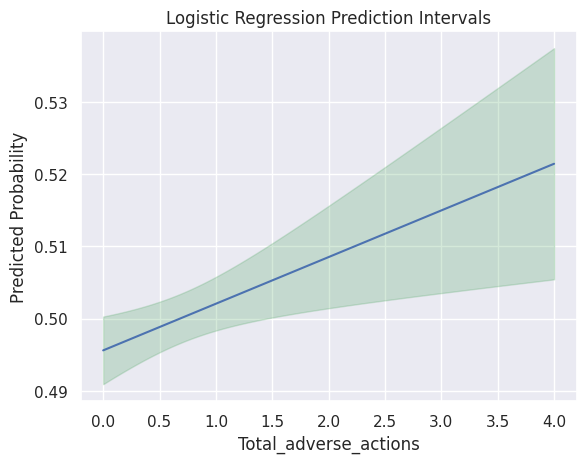

In [69]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import statsmodels.api as sm

# choose Total_adverse_actions as the IV
modf = sm.Logit.from_formula('Sex ~ Total_adverse_actions ', trainingdata_resampled)
resf = modf.fit()
mef = resf.get_margeff()

resf.summary()
mef.summary()

from scipy import stats

Λ = lambda x: stats.logistic().cdf(x)
λ = lambda x: stats.logistic().pdf(x)

β_ = resf.params.values.reshape(-1, 1)
V_ = resf.cov_params().values

def var_π(x, β, V_):
    #      λ(z)**s * x.T @ V_ @ x
    prob = λ(x.T.dot(β))**2 * x.T.dot(V_).dot(x) 
    return prob

def var_πs(xx, β, V_):
    α = λ(xx.dot(β))**2
    out = np.empty((500, 1))
    for i, x in enumerate(xx):
        out[i] = x.T.dot(V_).dot(x)
    return α * out

xx = sm.add_constant(np.linspace(trainingdata_resampled.Total_adverse_actions .min(), trainingdata_resampled.Total_adverse_actions .max(), 500).reshape(-1, 1))
πs = Λ(xx.dot(β_))
vv = np.sqrt(var_πs(xx, β_, V_))

plt.plot(xx[:, 1], πs)
plt.fill_between(xx[:, 1], (πs - 1.96*vv).ravel(), (πs + 1.96*vv).ravel(),
                 alpha=.25, color='g')
plt.xlabel('Total_adverse_actions')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Prediction Intervals')

# Assumption check

Optimization terminated successfully.
         Current function value: 0.688559
         Iterations 4


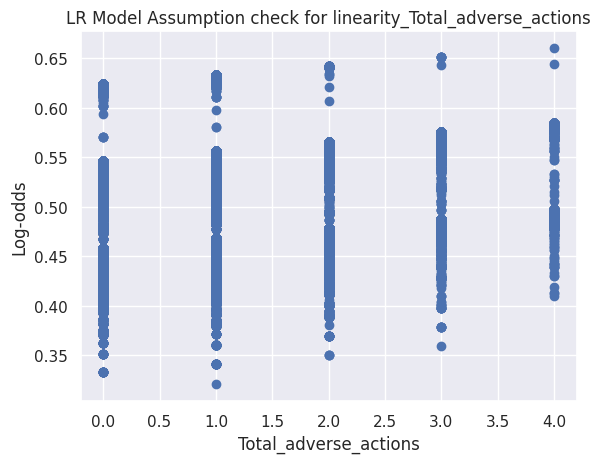

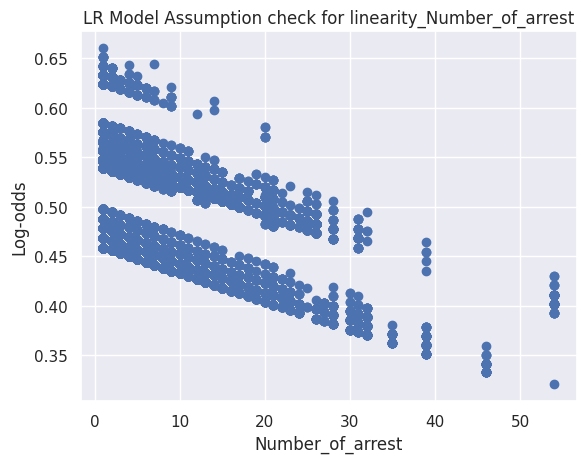

In [70]:
# Linearity of Logit: 

reg2 = smf.logit('Sex ~ Youth_at_arrest__under_18_years_Youth + Perceived_Race_White + Total_adverse_actions + Number_of_arrest', data=trainingdata_resampled).fit()

y_train_sample_pred_2 = reg2.predict(x_train_resampled)

pred_2 = reg2.predict(x_train_resampled)
# round() rounds to nearest integer; 0.5 rounds to 0; 0.501 rounds to 1
prediction_2 = list(map(round, pred_2))

# Visualize predictor variable vs logit values for Age
plt.scatter(x=trainingdata_resampled['Total_adverse_actions'].values, y = y_train_sample_pred_2)
plt.xlabel("Total_adverse_actions")
plt.ylabel("Log-odds")
plt.title('LR Model Assumption check for linearity_Total_adverse_actions')
plt.show()

# Visualize predictor variable vs logit values for Age
plt.scatter(x=trainingdata_resampled['Number_of_arrest'].values, y = y_train_sample_pred_2)
plt.xlabel("Number_of_arrest")
plt.ylabel("Log-odds")
plt.title('LR Model Assumption check for linearity_Number_of_arrest')
plt.show()

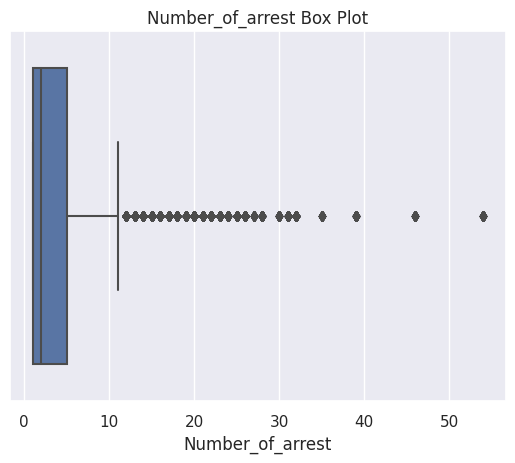

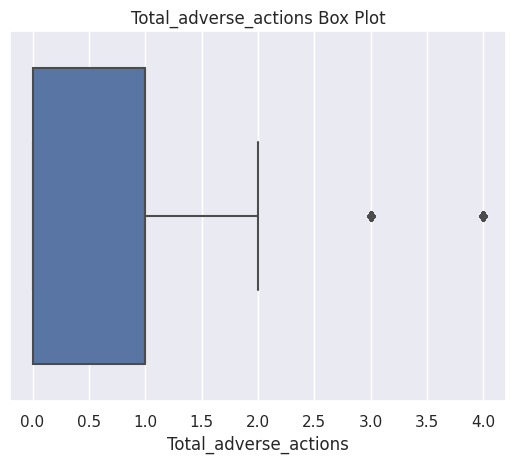

In [71]:
num_arrest = sns.boxplot(x= 'Number_of_arrest', data= x_train_resampled).set_title("Number_of_arrest Box Plot")
plt.show()
Total_adverse_actions = sns.boxplot(x= 'Total_adverse_actions', data= x_train_resampled).set_title("Total_adverse_actions Box Plot")
plt.show()